In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.gridspec import GridSpec
import pyscamp as scamp
import stumpy as stump
import dvats.memory as mem
import dvats.mplots as mp

In [2]:
#Common
ts = np.random.rand(10000)
m = 50

In [3]:
print("Ts ~ ", ts.shape)
print("Expected mp length: ", int(np.floor(ts.shape[0]-m+1)))

Ts ~  (10000,)
Expected mp length:  9951


In [4]:
mp_stumpy = mp.MatrixProfile()
mp_stumpy.compute(ts, m, 'stump', True, True, True)

--> matrix profile
--> Stump


/usr/local/share/miniconda3/envs/env/lib/python3.10/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 20 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


matrix profile <bound method Time.duration of Time(time_start=1710154743.175235, time_end=1710154748.4022498, time_total=5.227014780044556)> seconds -->


array([7.223909498313295, 6518, -1, 6518], dtype=object)

In [6]:
print(mp_stumpy.matrix_profile)

[7.223909498313295 6518 -1 6518]


In [6]:
mp_scamp = mp.
mp_scamp, index_scamp = scamp.selfjoin(ts, m)

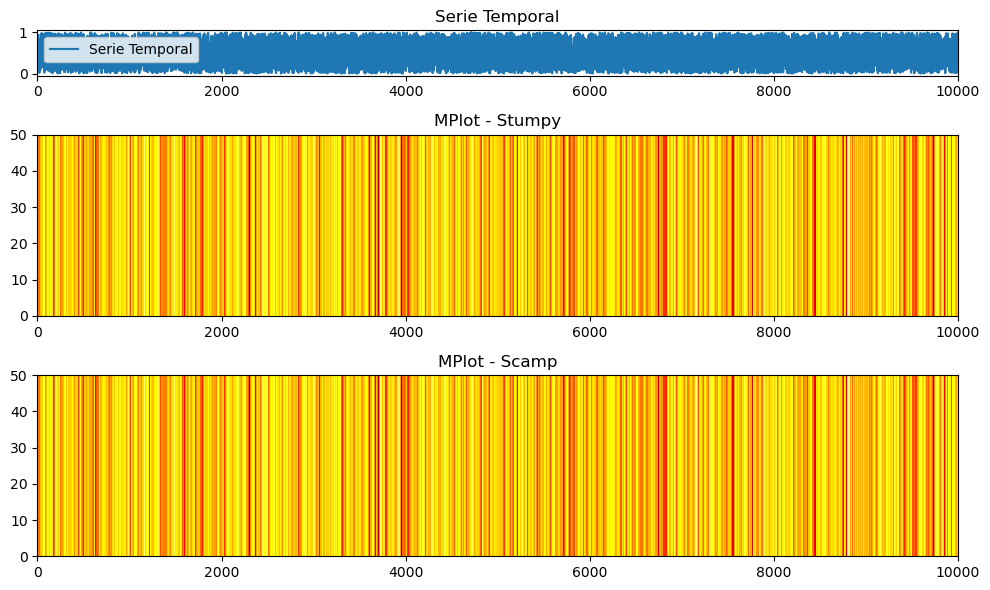

In [7]:
def plot_mps(ts, mp_stumpy, mp_scamp):
    fig = plt.figure(figsize=(10, 6))
    gs = GridSpec(3, 1, height_ratios=[1, 4, 4])
    # Serie temporal
    ax1 = fig.add_subplot(gs[0])
    ax1.plot(ts, label="Serie Temporal")
    ax1.set_title("Serie Temporal")
    ax1.legend()
    # MPlot
    ax2 = fig.add_subplot(gs[1], sharex=ax1)
    mp_values = mp_stumpy[:, 0].astype(float) # Extraer solo los valores del perfil de similitud
    ax2.imshow(mp_values.reshape(-1, 1).T, aspect='auto', origin='lower', cmap='hot', extent=(0, len(ts), 0, m))
    ax2.set_title("MPlot - Stumpy")
    
    ax3 = fig.add_subplot(gs[2], sharex=ax1)
    mp_values = mp_scamp.astype(float) # Extraer solo los valores del perfil de similitud
    ax3.imshow(mp_values.reshape(-1, 1).T, aspect='auto', origin='lower', cmap='hot', extent=(0, len(ts), 0, m))
    ax3.set_title("MPlot - Scamp")

    plt.tight_layout()
    plt.show()
plot_mps(ts, mp_stumpy, mp_scamp)

### Ejemplo de STUMPY Basics - Analyzing Motifs and Anomalies with STUMP and SCAMP
https://stumpy.readthedocs.io/en/latest/Tutorial_The_Matrix_Profile.html

In [8]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [9]:
steam_df = pd.read_csv("https://zenodo.org/record/4273921/files/STUMPY_Basics_steamgen.csv?download=1")
steam_df.head()

,drum pressure,excess oxygen,water level,steam flow
0,320.08239,2.506774,0.032701,9.302970
1,321.71099,2.545908,0.284799,9.662621
2,320.91331,2.360562,0.203652,10.990955
3,325.00252,0.027054,0.326187,12.430107
4,326.65276,0.285649,0.753776,13.681666


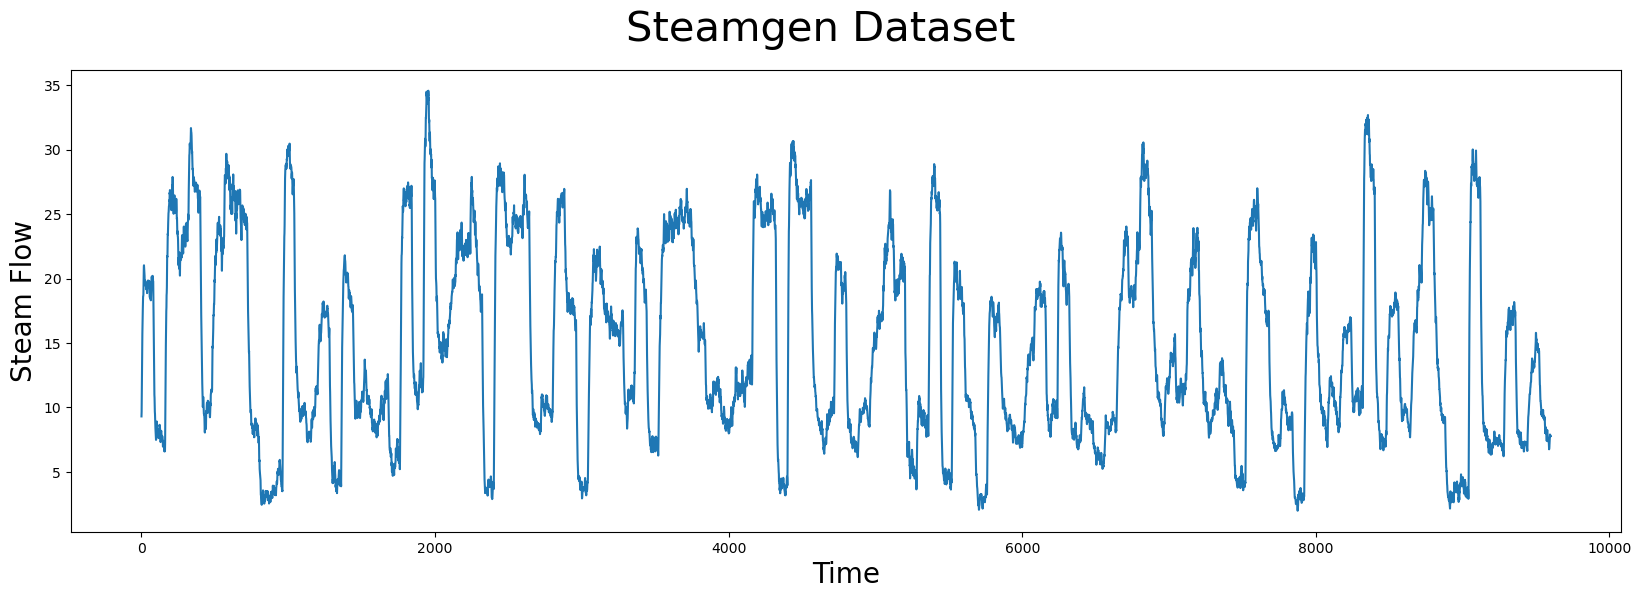

In [10]:
plt.suptitle('Steamgen Dataset', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Steam Flow', fontsize='20')
plt.plot(steam_df['steam flow'].values)
plt.show()

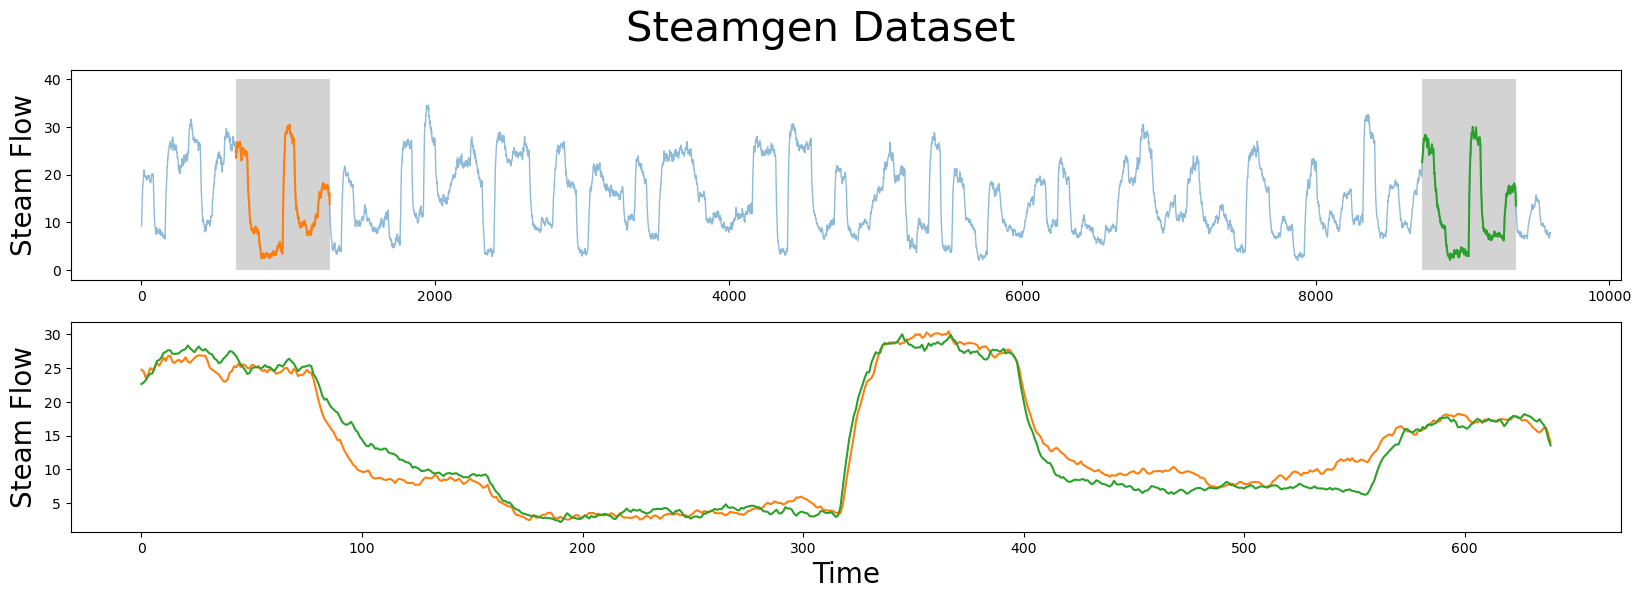

In [11]:
m = 640
fig, axs = plt.subplots(2)
plt.suptitle('Steamgen Dataset', fontsize='30')
axs[0].set_ylabel("Steam Flow", fontsize='20')
axs[0].plot(steam_df['steam flow'], alpha=0.5, linewidth=1)
axs[0].plot(steam_df['steam flow'].iloc[643:643+m])
axs[0].plot(steam_df['steam flow'].iloc[8724:8724+m])
rect = Rectangle((643, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((8724, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel("Time", fontsize='20')
axs[1].set_ylabel("Steam Flow", fontsize='20')
axs[1].plot(steam_df['steam flow'].values[643:643+m], color='C1')
axs[1].plot(steam_df['steam flow'].values[8724:8724+m], color='C2')
plt.show()

In [12]:
m = 640
ts = steam_df['steam flow']
mp_scamp, index_scamp = scamp.selfjoin(ts, m)
mp_stumpy = stump.gpu_stump(ts, m)

/usr/local/share/miniconda3/envs/env/lib/python3.10/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 18 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


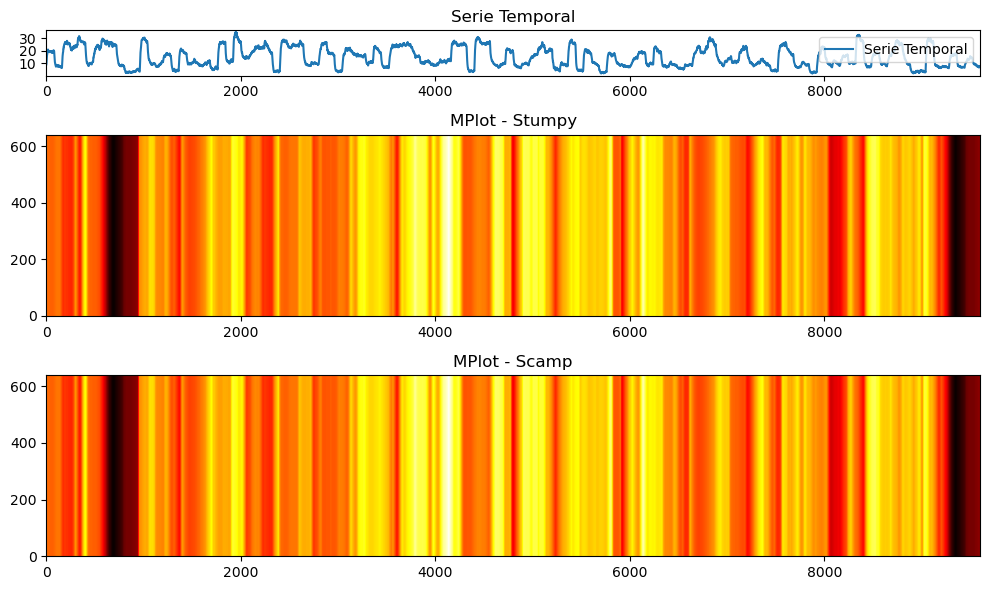

In [13]:
plot_mps(ts , mp_stumpy, mp_scamp)

In [14]:
print("Ts ~ ", ts.shape)
print("Expected mp length: ", int(np.floor(ts.shape[0]-m+1)))
print("mp_stumpy ~", mp_stumpy.shape)
print("mp_scamp ~", mp_scamp.shape)
print("mp_index ~", index_scamp.shape)
print(mp_stumpy[:, 0])
print(mp_scamp)

Ts ~  (9600,)
Expected mp length:  8961
mp_stumpy ~ (8961, 4)
mp_scamp ~ (8961,)
mp_index ~ (8961,)
[16.23541147724788 16.081918663230628 15.909403017873382 ...
 9.022931372214835 9.038259675949162 9.054692514421182]
[16.23541   16.081919  15.909404  ...  9.02293    9.0382595  9.054692 ]


In [15]:
mp_stumpy_sorted = np.argsort(mp_stumpy[:,0])
mp_stumpy_sorted

array([ 643, 8724, 8725, ..., 3865, 3863, 3864])

In [16]:
mp_scamp_sorted = np.argsort(mp_scamp)
mp_scamp_sorted

array([8724,  643, 8725, ..., 3865, 3863, 3864])

In [17]:
motif_idx_stumpy = mp_stumpy_sorted[0]
motif_idx_scamp = mp_scamp_sorted[0]
print(f"The motif (according to stumpy) is located at index {motif_idx_stumpy}")
print(f"The motif (according to scamp) is located at index {motif_idx_scamp}")

The motif (according to stumpy) is located at index 643
The motif (according to scamp) is located at index 8724


### --> Tiene sentido que haya salido diferente por tema de decimales... 
> ¿Serán vecinos?

In [18]:
nearest_neighbor_idx_stumpy = mp_stumpy[motif_idx_stumpy, 1]
nearest_neighbor_idx_scamp = index_scamp[motif_idx_scamp]
print(f"The nearest neighbor (stumpy) is located at index {nearest_neighbor_idx_stumpy}")
print(f"The nearest neighbor (scamp) is located at index {nearest_neighbor_idx_scamp}")

The nearest neighbor (stumpy) is located at index 8724
The nearest neighbor (scamp) is located at index 643


¡Son los vecinos más cercanos en ambos casos!
De hecho, si imprimimos los valores, la z-distancia euclídea es la misma hasta donde podemos ver...

In [19]:
print(mp_stumpy[:,0][643])
print(mp_stumpy[:,0][8724])
print(mp_scamp[8724])
print(mp_scamp[643])

5.491619827769913
5.491619827769913
5.4916167
5.4916167


In [20]:
mp_stumpy[:,1][643]

8724

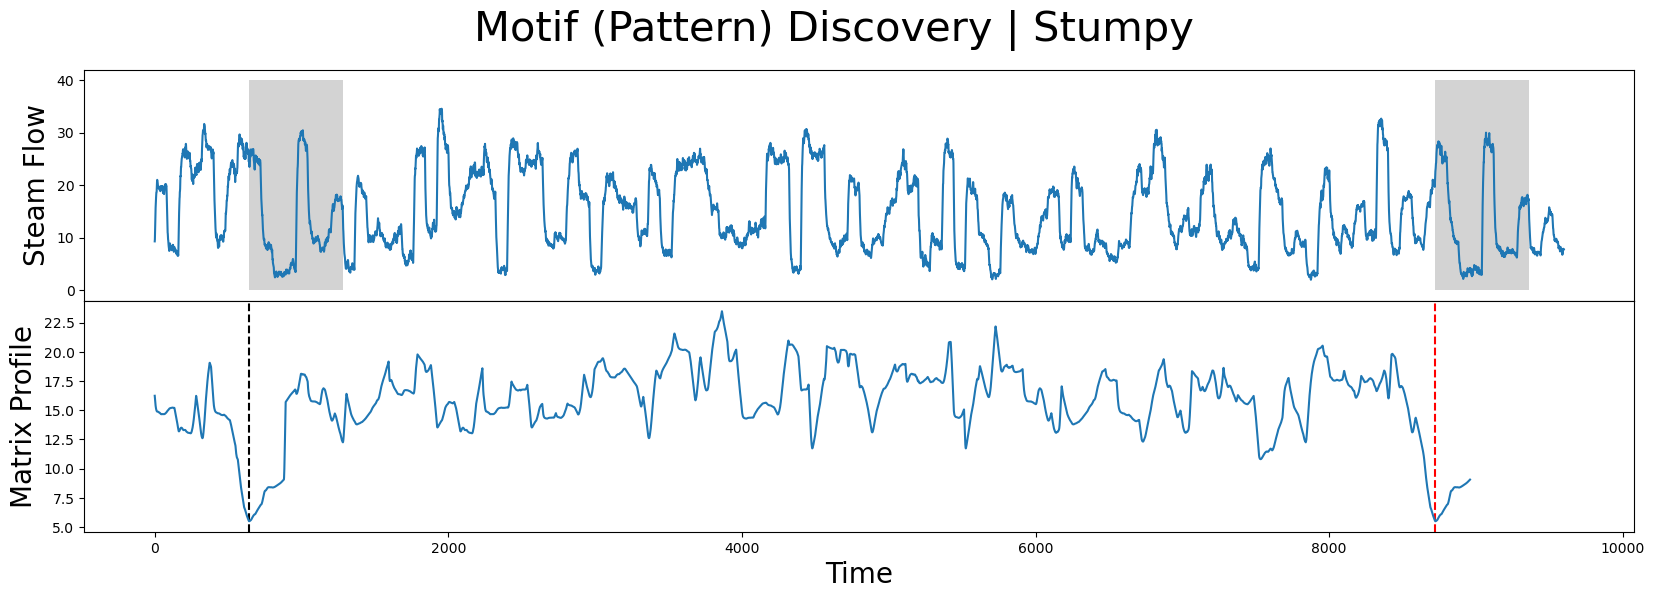

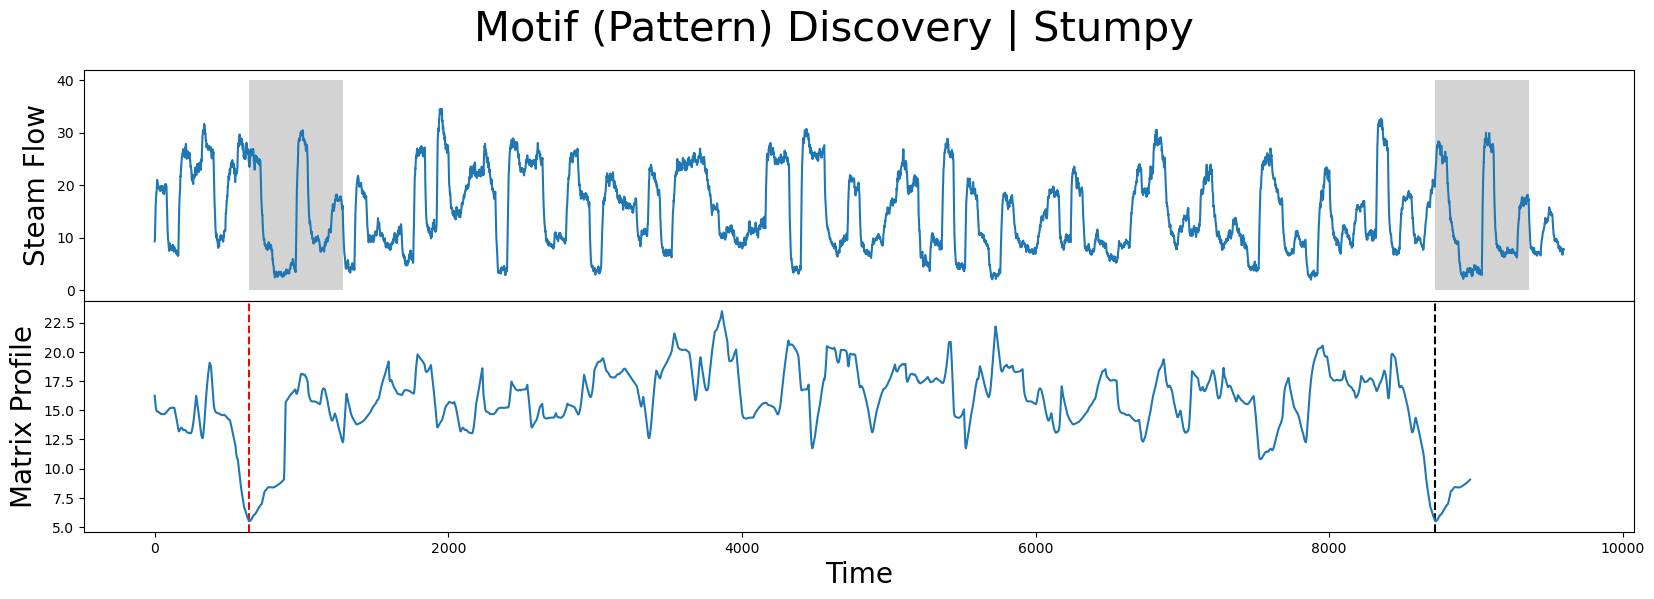

In [21]:
ts_name = 'Steam Flow'
def plt_motifs(ts, mp, ts_name, algorithm, motif_idx, nearest_neighbor_idx):
    fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
    plt.suptitle('Motif (Pattern) Discovery | ' + algorithm , fontsize='30')

    axs[0].plot(ts.values)
    axs[0].set_ylabel(ts_name, fontsize='20')
    rect = Rectangle((motif_idx, 0), m, 40, facecolor='lightgrey')
    axs[0].add_patch(rect)
    rect = Rectangle((nearest_neighbor_idx, 0), m, 40, facecolor='lightgrey')
    axs[0].add_patch(rect)
    axs[1].set_xlabel('Time', fontsize ='20')
    axs[1].set_ylabel('Matrix Profile', fontsize='20')
    axs[1].axvline(x=motif_idx, linestyle="dashed", color = "black")
    axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed", color="red")
    axs[1].plot(mp)
    plt.show()
plt_motifs(ts, mp_stumpy[:,0], ts_name, "Stumpy", motif_idx_stumpy, nearest_neighbor_idx_stumpy)
plt_motifs(ts, mp_scamp, ts_name, "Stumpy", motif_idx_scamp, nearest_neighbor_idx_scamp)

## Discord

In [22]:
discord_idx_stumpy = mp_stumpy_sorted[-1]
discord_idx_scamp = mp_scamp_sorted[-1]
print(f"Stumpy: The discord is located at index {discord_idx_scamp}")
print(f"Scamp: The discord is located at index {discord_idx_scamp}")

Stumpy: The discord is located at index 3864
Scamp: The discord is located at index 3864


In [23]:
print("Stumpy | Discord: ", mp_stumpy[discord_idx_stumpy])
print("Scamp |  Discord: [", 
      mp_scamp[discord_idx_scamp], index_scamp[discord_idx_scamp], "]")

Stumpy | Discord:  [23.476168367301856 4755 1864 4755]
Scamp |  Discord: [ 23.476168 4755 ]


The subsequence located at this global maximum is also referred to as a discord, novelty, or “potential anomaly”:

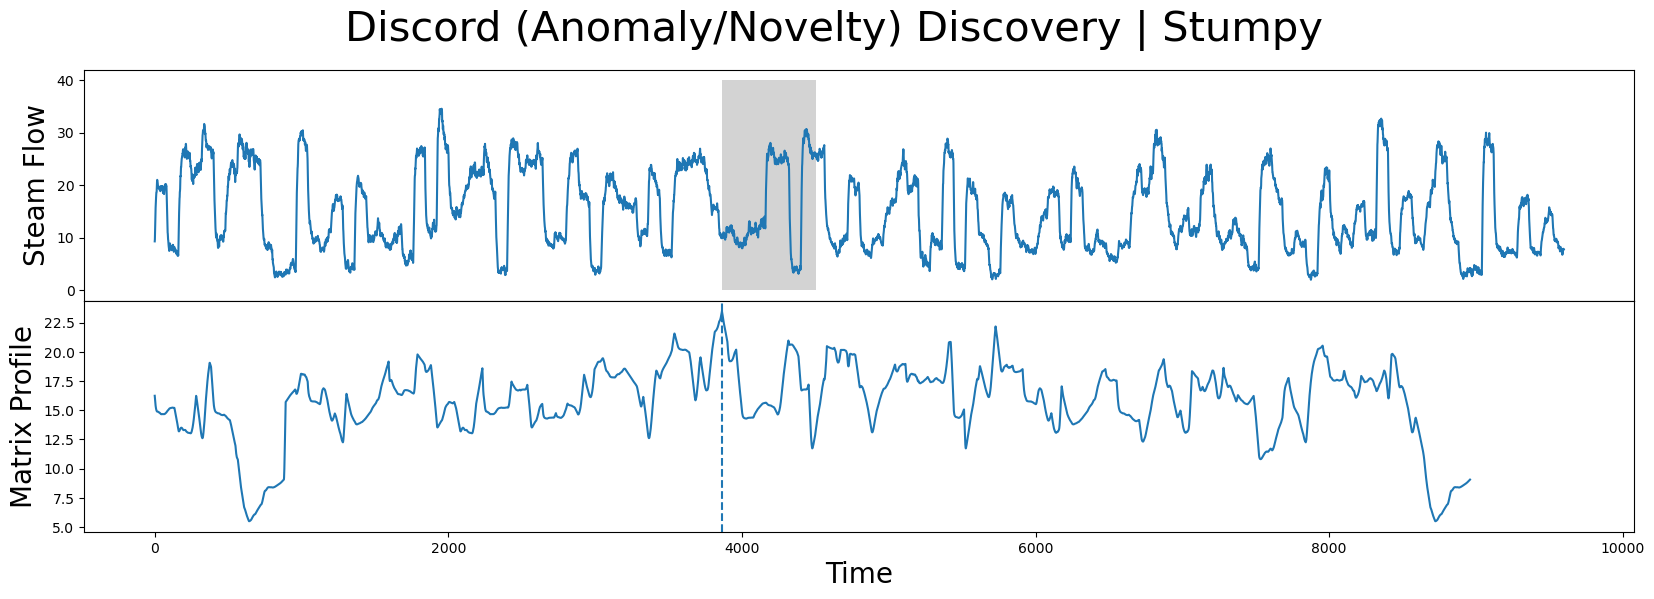

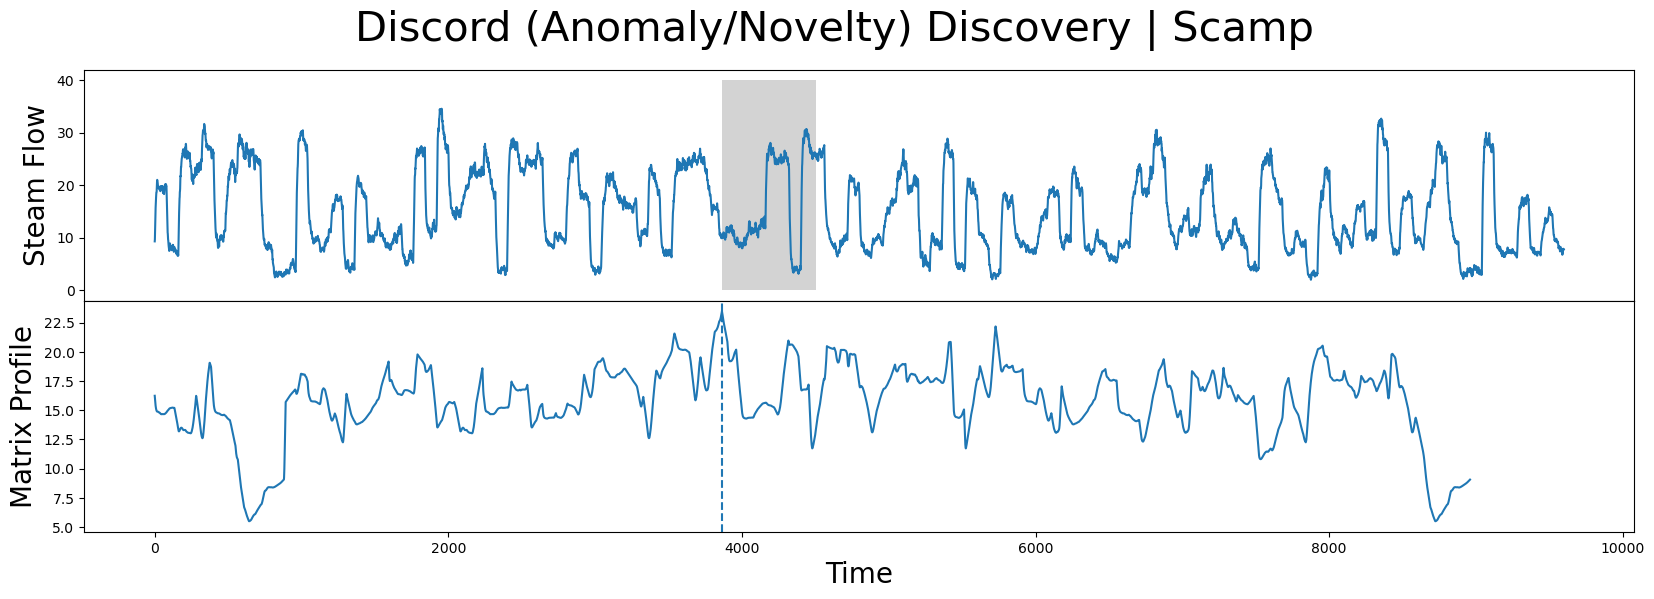

In [24]:
def plot_discord(ts, mp, ts_name, algorithm, discord_idx):
    fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
    plt.suptitle('Discord (Anomaly/Novelty) Discovery | '+ algorithm, fontsize='30')

    axs[0].plot(ts.values)
    axs[0].set_ylabel(ts_name, fontsize='20')
    rect = Rectangle((discord_idx, 0), m, 40, facecolor='lightgrey')
    axs[0].add_patch(rect)
    axs[1].set_xlabel('Time', fontsize ='20')
    axs[1].set_ylabel('Matrix Profile', fontsize='20')
    axs[1].axvline(x=discord_idx, linestyle="dashed")
    axs[1].plot(mp)
    plt.show()
plot_discord(ts, mp_stumpy[:,0], ts_name, "Stumpy", discord_idx_stumpy)
plot_discord(ts, mp_scamp, ts_name, "Scamp", discord_idx_scamp)

Intentando ver la matriz Distance Profile al completo

In [25]:
steam_flow = steam_df['steam flow'].values
#No nans
steam_flow = [ 0 if np.isnan(x) else x for x in steam_flow ]

Cogiendo Distance Matrix al completo

In [26]:
m = 640

In [27]:
steam_flow = steam_df['steam flow'].values
#No nans
steam_flow = [ 0 if np.isnan(x) else x for x in steam_flow ]

In [28]:
n = len(steam_flow) 
subsequence_len = m
print("Expected: ", len(steam_flow) - m + 1)

Expected:  8961


In [29]:
MPlot_matrix_stumpy = np.empty((n - m + 1, n - m + 1))
MPlot_matrix_scamp = np.empty((n - m + 1, n - m + 1))

In [30]:
reference_idx = np.random.randint(low=0, high=len(steam_flow) - m)
reference_subseq = steam_flow[reference_idx:reference_idx + m]

In [31]:
# Calcular el Distance Profile para cada subsecuencia en la serie temporal
distance_matrix_stumpy = np.array([
    stump.core.mass(reference_subseq, steam_flow[i:i + m]) 
    for i in range(len(steam_flow) - m + 1)
])

distance_matrix_scamp = np.array([
    scamp.abjoin(reference_subseq, steam_flow[i:i + m], m)[0]
    for i in range(len(steam_flow) - m + 1)
])

In [32]:
print(len(steam_flow))
print(distance_matrix_stumpy.shape)
print(distance_matrix_scamp.shape)
print(MPlot_matrix_stumpy.shape)
print(MPlot_matrix_scamp.shape)

9600
(8961, 1)
(8961, 1)
(8961, 8961)
(8961, 8961)


In [37]:
#import torch
#torch.cuda.set_device(0)

In [39]:
#Calculamos el MPlot
for i in range(n - m + 1):
    ### Calculamos el Distance Profile utilizando el algoritmo MASS / Scamp
    MPlot_matrix_stumpy[i,:] = stump.core.mass(steam_flow[i:i + m], steam_flow)

In [47]:
print(n)
steam_flow

9600


[9.3029701,
 9.6626206,
 10.990955,
 12.430107,
 13.681666,
 14.608885999999998,
 15.7132,
 16.536307,
 17.025369,
 17.61613,
 18.101964,
 18.617838,
 18.635723,
 18.751322,
 19.508894,
 20.456632,
 20.896455,
 21.027555,
 20.836174,
 20.700635,
 20.394276,
 20.221607,
 19.741009,
 19.849174,
 19.753394,
 19.77857,
 19.799859,
 19.439141,
 19.584162,
 19.499002,
 19.649351,
 19.328394,
 19.169509,
 19.235623,
 19.278401,
 19.340028,
 19.342076,
 19.112734,
 18.867467,
 19.073703,
 19.238704,
 19.330707,
 19.74182,
 19.829021,
 19.73419,
 19.722264000000003,
 19.838407,
 19.686409,
 19.420519,
 19.458585,
 19.388755,
 19.331936,
 19.706821,
 19.818001,
 19.503039,
 18.989663,
 18.621073000000003,
 18.534034,
 18.593332,
 18.664088,
 18.542793,
 18.38165,
 18.366319,
 18.358475,
 18.310149,
 18.671321,
 19.095534,
 19.519949,
 19.652749,
 19.952451,
 20.146499,
 19.887907,
 19.82438,
 19.962698,
 20.110549,
 20.095481,
 20.207923,
 20.001645,
 20.070029,
 19.7414,
 19.751994,
 18.594969,

In [42]:
n-m+1

8961

In [44]:
m

640

In [40]:
def plot_mp(ts, ts_name, MPlot_matrix, algorithm):
    fig = plt.figure(figsize=(10, 10))
    gs = GridSpec(2, 1, height_ratios=[1, 4])

    # Serie temporal
    ax1 = fig.add_subplot(gs[0])
    ax1.plot(ts, label="Serie Temporal")
    ax1.set_title(ts_name + " | " +  algorithm)
    ax1.legend()

    # MPlot
    ax2 = fig.add_subplot(gs[1], sharex=ax1)
    # Utilizar 'imshow' para visualizar la matriz MPlot
    ax2.imshow(MPlot_matrix, aspect='auto', origin='lower', cmap='hot', extent=(0, len(ts) - m, 0, len(ts) - m))
    ax2.set_title("MPlot")
    ax2.set_xlabel('Subsecuencia Inicial')
    ax2.set_ylabel('Subsecuencia Referencia')

    plt.tight_layout()
    plt.show()

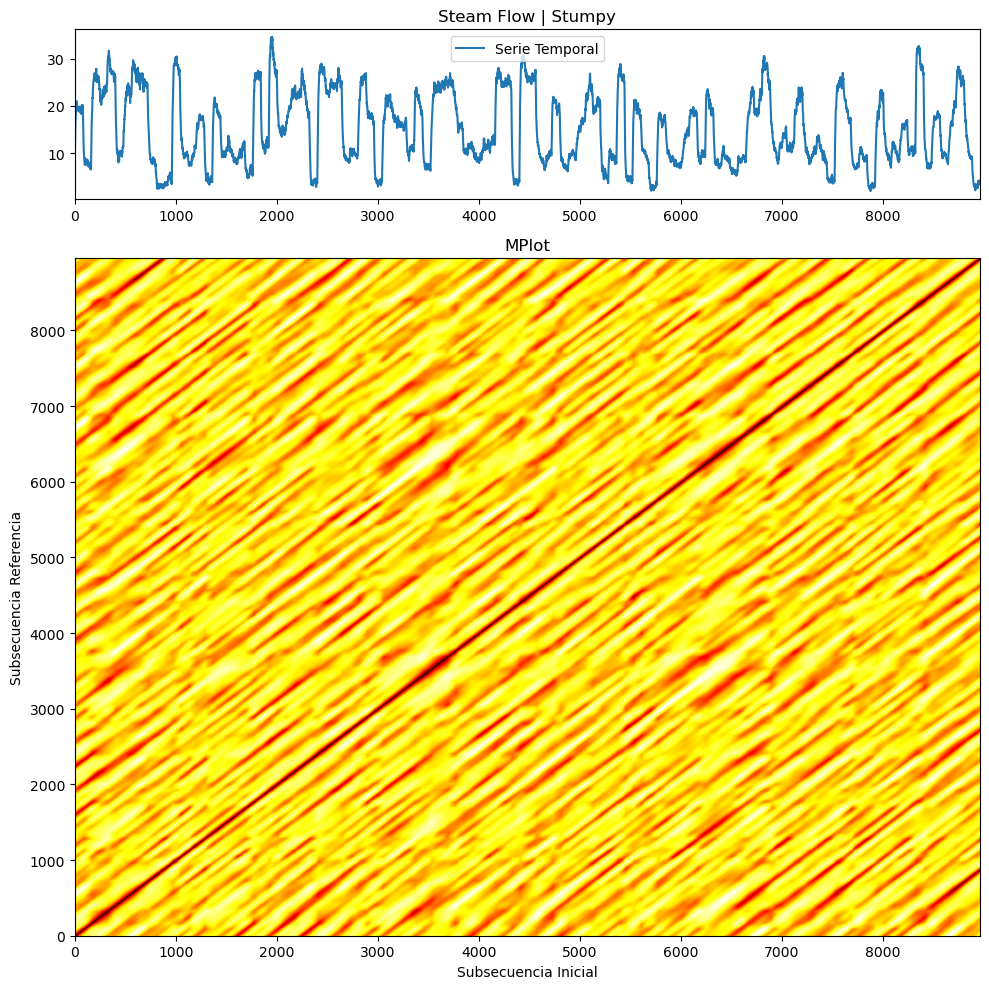

In [41]:
plot_mp(steam_flow, ts_name, MPlot_matrix_stumpy, "Stumpy")

In [ ]:
mp_scamp, _ = scamp.selfjoin(ts, m)

In [ ]:
mp_scamp.shape

In [ ]:
#https://scamp-docs.readthedocs.io/en/latest/pyscamp/_generate/pyscamp.selfjoin_matrix.htm

In [ ]:
ts.shape

In [ ]:
MPlot_matrix_stumpy.shape

In [ ]:
MPlot_matrix_stumpy

In [ ]:
print(np.isnan(steam_flow).any())

In [ ]:
# MPlot_matrix_stumpy[i,:] = stump.core.mass(steam_flow[i:i + m], steam_flow)
MPlot_matrix_scamp = scamp.selfjoin_matrix(
    steam_flow, 
    m, 
    gpus=[],
    mheight = n - m + 1, 
    mwidth = n - m + 1,
    verbose = True,
    pearson = False
)

In [ ]:
MPlot_matrix_scamp.shape

In [ ]:
MPlot_matrix_scamp

In [ ]:
plot_mp(steam_flow, ts_name, MPlot_matrix_scamp, "Scamp")